<a href="https://colab.research.google.com/github/Sanmarquino/Data_Banco_Ciencia_DATOS/blob/main/CEU_MODELOS_PREDICTIVOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelamiento Predictivo con Ciencia de Datos.**

# **Módulo 1**

## **1. Importación de Datos**
# Conectando la data caso_bancario.csv


In [ ]:
# Cargar de datos
import pandas as pd
df = pd.read_csv('/content/caso_bancario.csv', sep=';', encoding = 'latin-1')

In [ ]:
df.head()

,id,mora,atraso,casa,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ
0,1,0,235,FAMILIAR,30,3748,93.0,5,3500.0,NaN,0.00,214,Lima,4,PROFESIONAL
1,2,0,18,FAMILIAR,32,4598,9.0,12,900.0,1824.67,1933.75,175,La Libertad,1,TECNICO
2,3,0,0,FAMILIAR,26,5148,8.0,2,2400.0,2797.38,188.29,187,Lima,0,PROFESIONAL
3,4,0,0,FAMILIAR,36,5179,20.0,12,2700.0,NaN,0.00,187,Ancash,0,TECNICO
4,5,0,0,FAMILIAR,46,3960,NaN,1,3100.0,2000.00,11010.65,189,Lima,0,TECNICO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5000 non-null   int64  
 1   mora          5000 non-null   int64  
 2   atraso        5000 non-null   int64  
 3   casa          5000 non-null   object 
 4   edad          5000 non-null   int64  
 5   dias_lab      5000 non-null   int64  
 6   exp_sf        3170 non-null   float64
 7   nivel_ahorro  5000 non-null   int64  
 8   ingreso       5000 non-null   float64
 9   linea_sf      3873 non-null   float64
 10  deuda_sf      4539 non-null   float64
 11  score         5000 non-null   int64  
 12  zona          5000 non-null   object 
 13  clasif_sbs    5000 non-null   int64  
 14  nivel_educ    5000 non-null   object 
dtypes: float64(4), int64(8), object(3)
memory usage: 586.1+ KB


## **2. Análisis Exploratorio de Datos (AED)**
### **Identificación de valores faltantes**

In [ ]:
print("Valores faltantes por columna:")
print(df.isnull().sum())

Valores faltantes por columna:
id                 0
mora               0
atraso             0
casa               0
edad               0
dias_lab           0
exp_sf          1830
nivel_ahorro       0
ingreso            0
linea_sf        1127
deuda_sf         461
score              0
zona               0
clasif_sbs         0
nivel_educ         0
dtype: int64


## **3. Manejo de Valores Faltantes**
### **Imputación de valores faltantes**

In [ ]:
# Imputar valores faltantes con la mediana
for col in ['exp_sf', 'linea_sf', 'deuda_sf']:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

print("Valores faltantes después de la imputación:")
print(df.isnull().sum())

Valores faltantes después de la imputación:
id              0
mora            0
atraso          0
casa            0
edad            0
dias_lab        0
exp_sf          0
nivel_ahorro    0
ingreso         0
linea_sf        0
deuda_sf        0
score           0
zona            0
clasif_sbs      0
nivel_educ      0
dtype: int64


### **Detección de valores atípicos (outliers)**

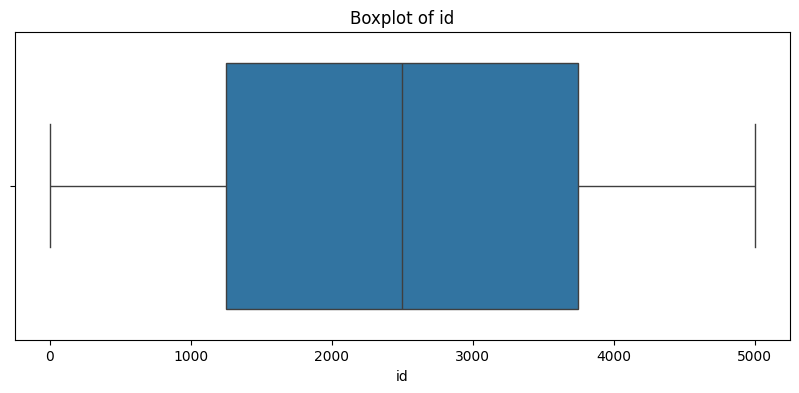

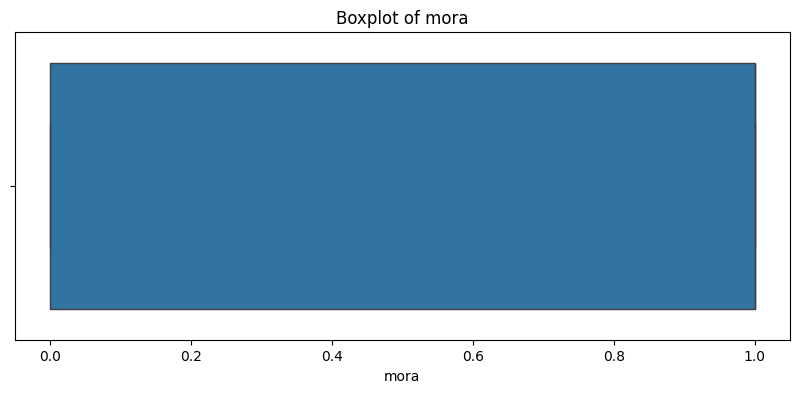

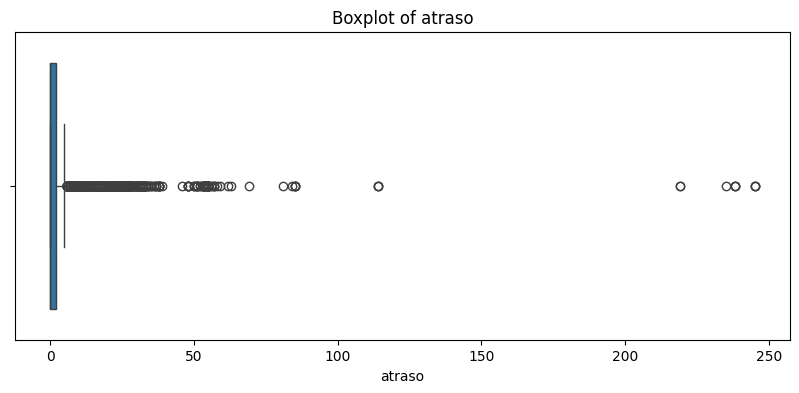

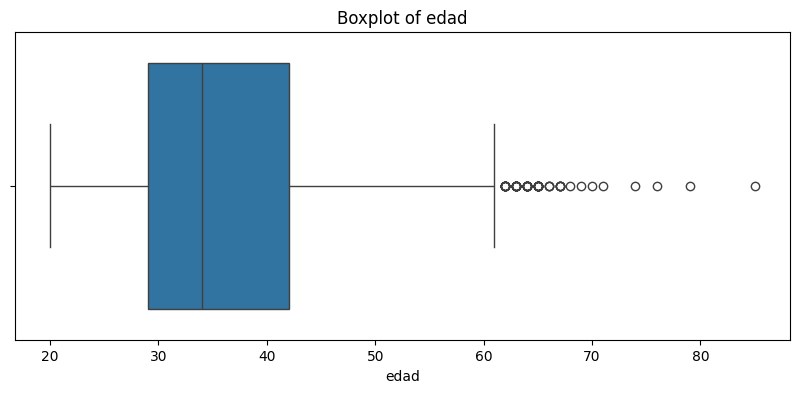

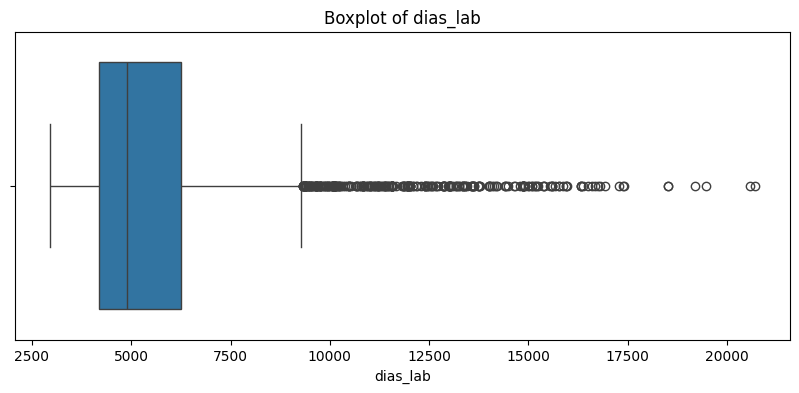

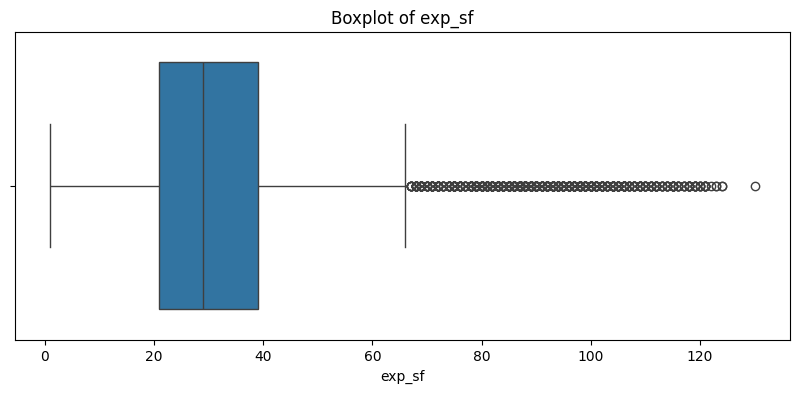

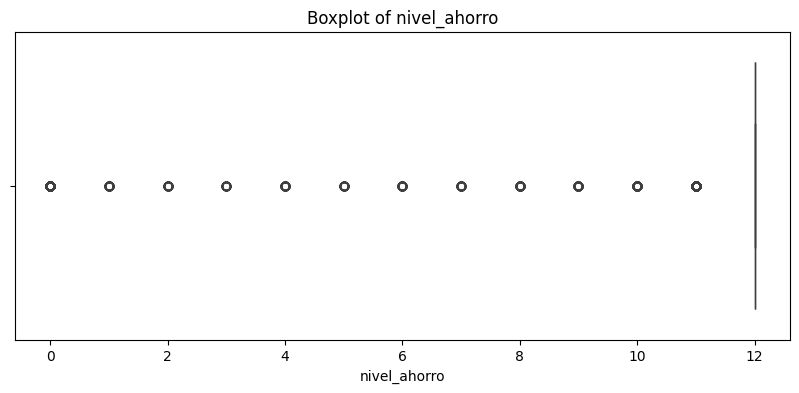

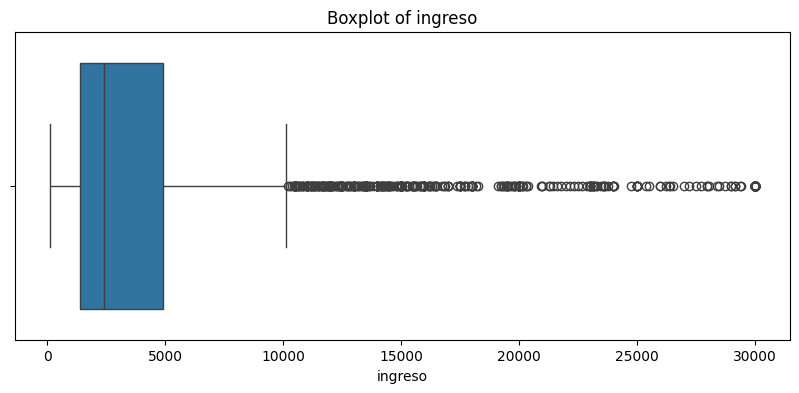

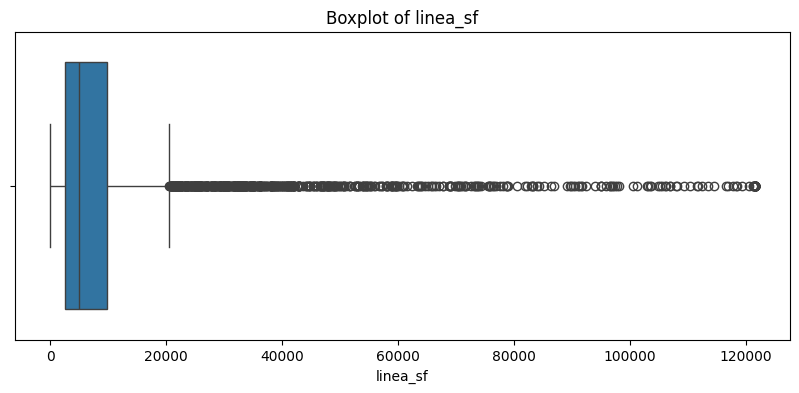

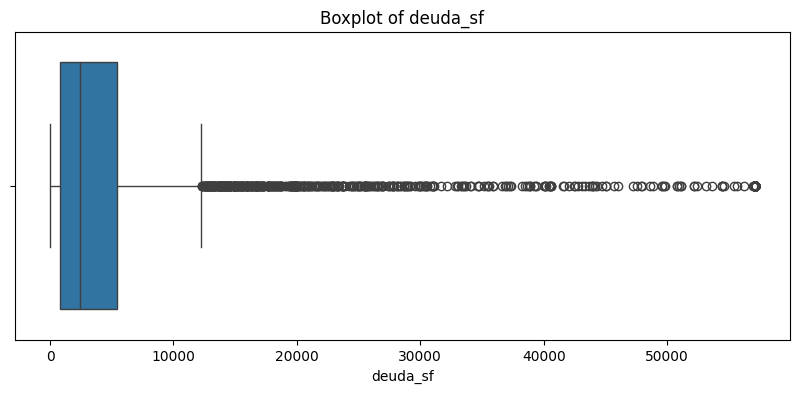

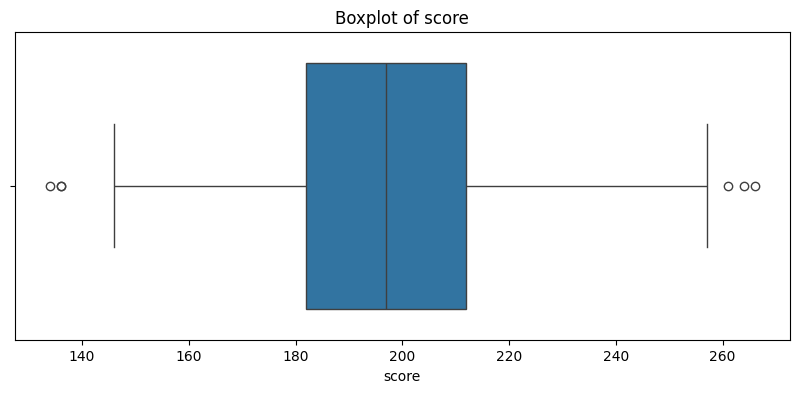

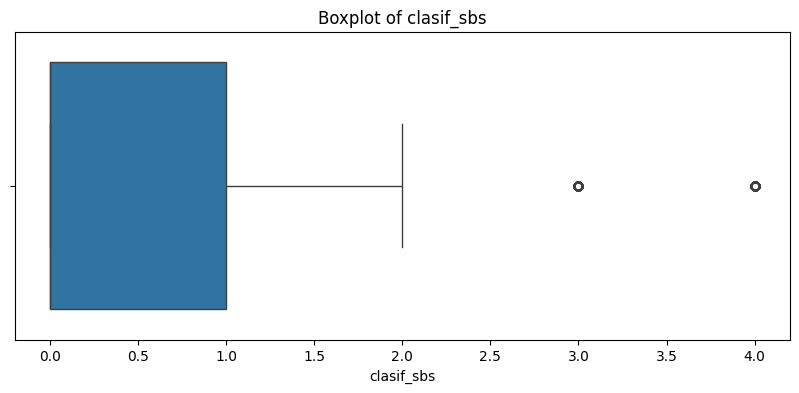

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo columnas numéricas para la detección de valores atípicos
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Dibujar diagramas de caja para columnas numéricas para visualizar valores atípicos
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
print("Data Info:")
df.info()

print("\nDescripción de datos:")
display(df.describe())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5000 non-null   int64  
 1   mora          5000 non-null   int64  
 2   atraso        5000 non-null   int64  
 3   casa          5000 non-null   object 
 4   edad          5000 non-null   int64  
 5   dias_lab      5000 non-null   int64  
 6   exp_sf        5000 non-null   float64
 7   nivel_ahorro  5000 non-null   int64  
 8   ingreso       5000 non-null   float64
 9   linea_sf      5000 non-null   float64
 10  deuda_sf      5000 non-null   float64
 11  score         5000 non-null   int64  
 12  zona          5000 non-null   object 
 13  clasif_sbs    5000 non-null   int64  
 14  nivel_educ    5000 non-null   object 
dtypes: float64(4), int64(8), object(3)
memory usage: 586.1+ KB

Descripción de datos:


,id,mora,atraso,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,clasif_sbs
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,0.700000,4.48080,36.429400,5582.003000,36.000000,10.571000,4373.572006,11363.736330,5957.506702,196.762400,0.563600
std,1443.520003,0.458303,13.94524,9.787225,2177.147387,26.097882,3.396125,5393.520235,19376.886655,10773.493598,19.416316,0.902728
min,1.000000,0.000000,0.00000,20.000000,2956.000000,1.000000,0.000000,123.700000,0.020000,0.000000,134.000000,0.000000
25%,1250.750000,0.000000,0.00000,29.000000,4195.000000,21.000000,12.000000,1400.000000,2589.295000,813.087500,182.000000,0.000000
50%,2500.500000,1.000000,0.00000,34.000000,4904.000000,29.000000,12.000000,2400.000000,5000.000000,2441.090000,197.000000,0.000000
75%,3750.250000,1.000000,2.00000,42.000000,6243.000000,39.000000,12.000000,4900.000000,9763.387500,5384.220000,212.000000,1.000000
max,5000.000000,1.000000,245.00000,85.000000,20700.000000,130.000000,12.000000,30000.000000,121543.400000,57094.380000,266.000000,4.000000


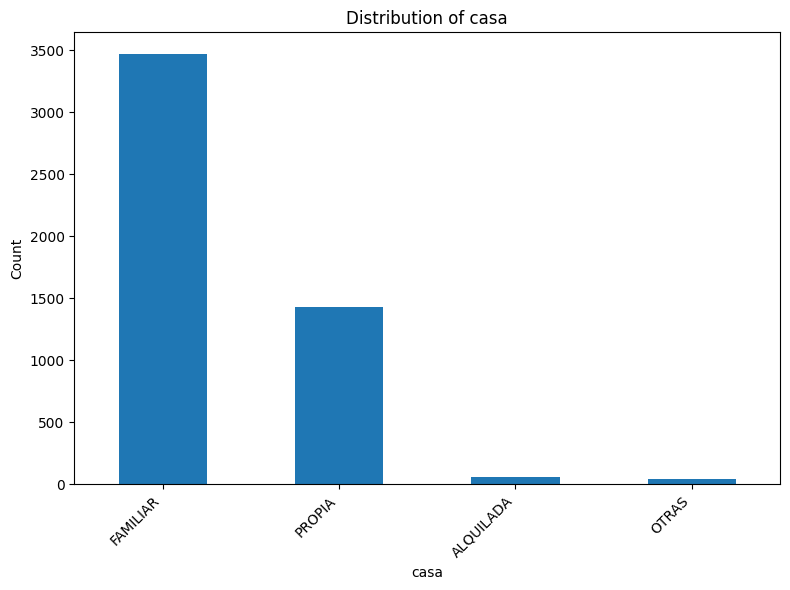

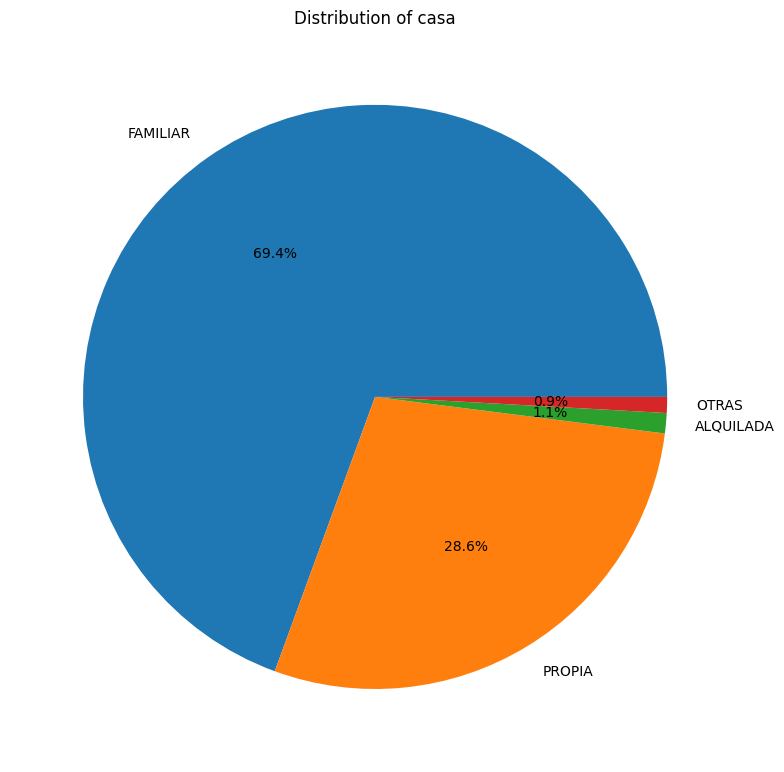

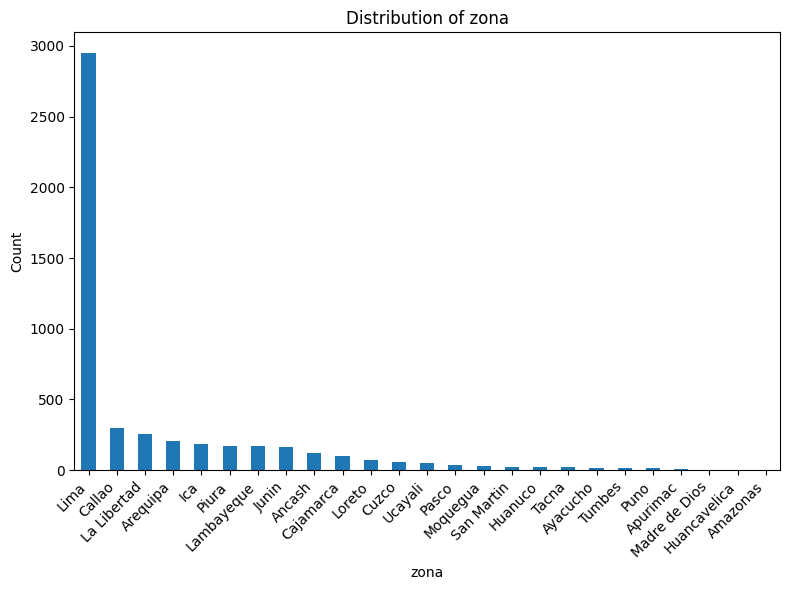

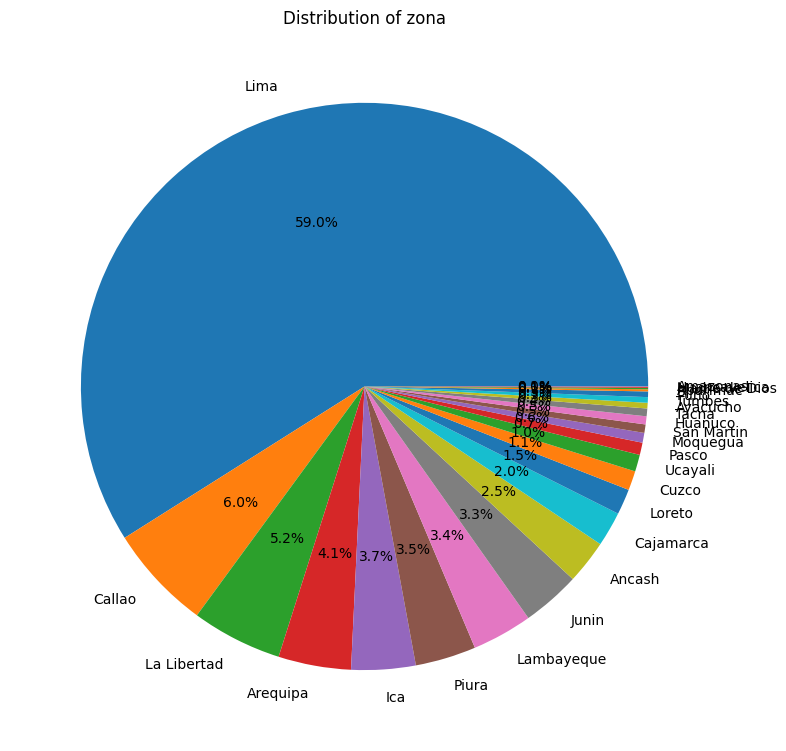

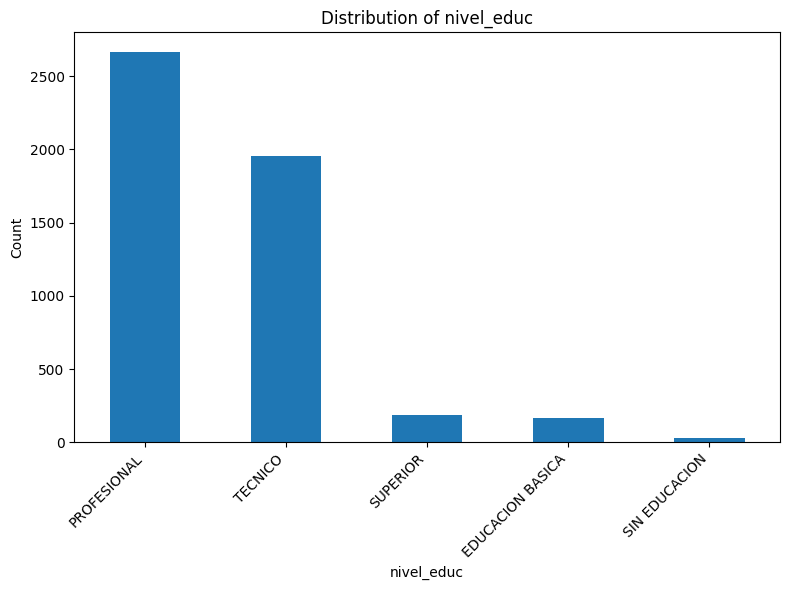

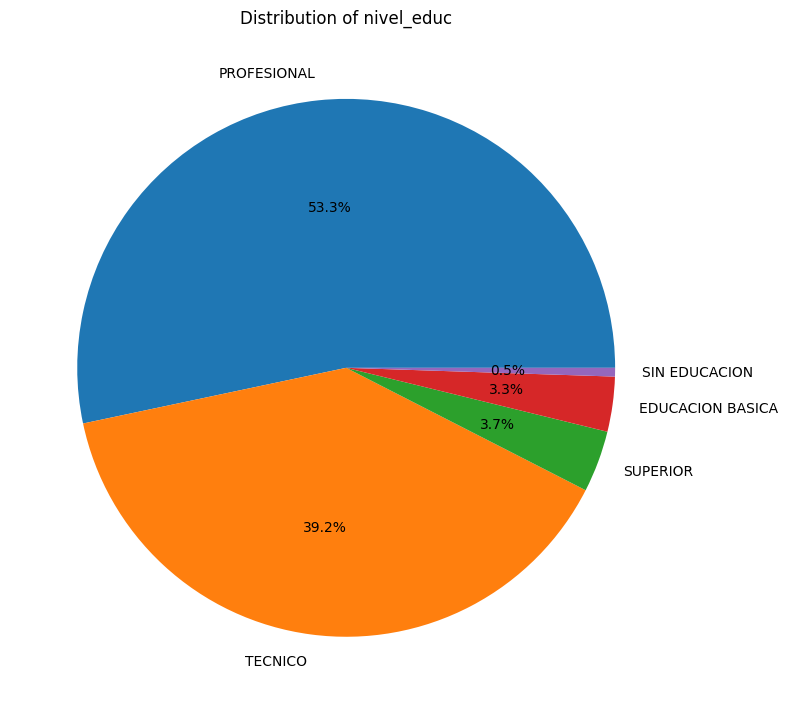

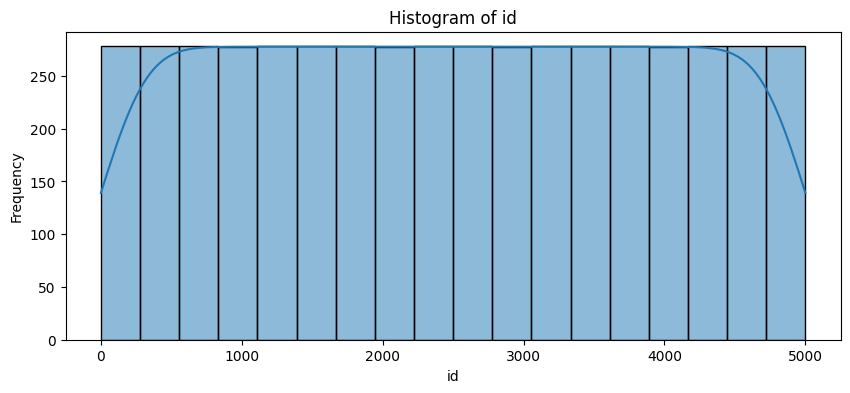

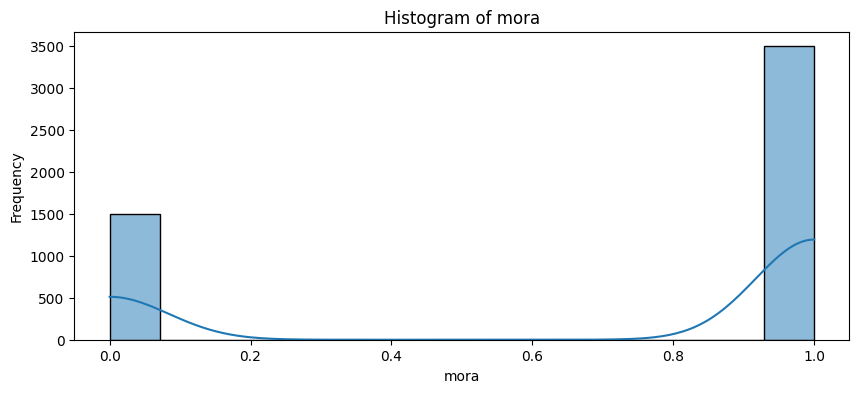

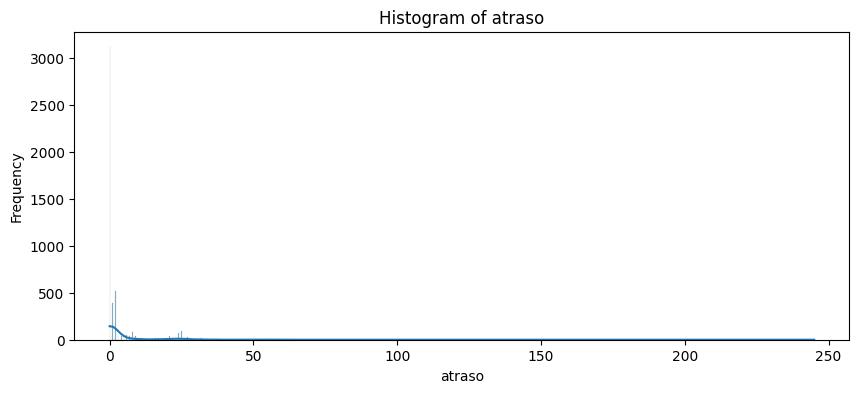

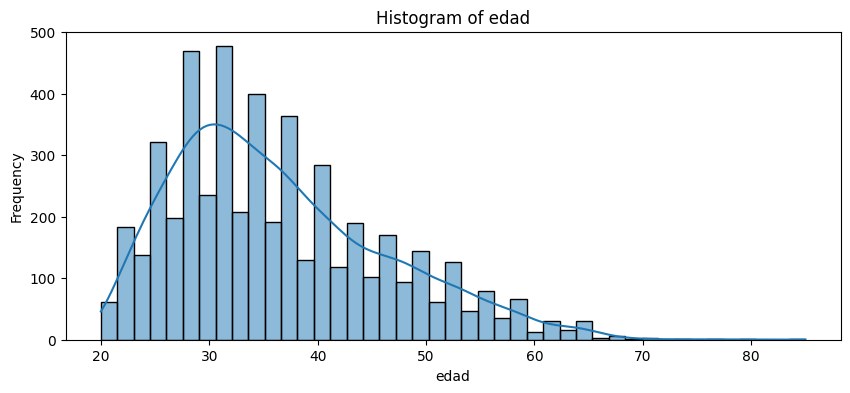

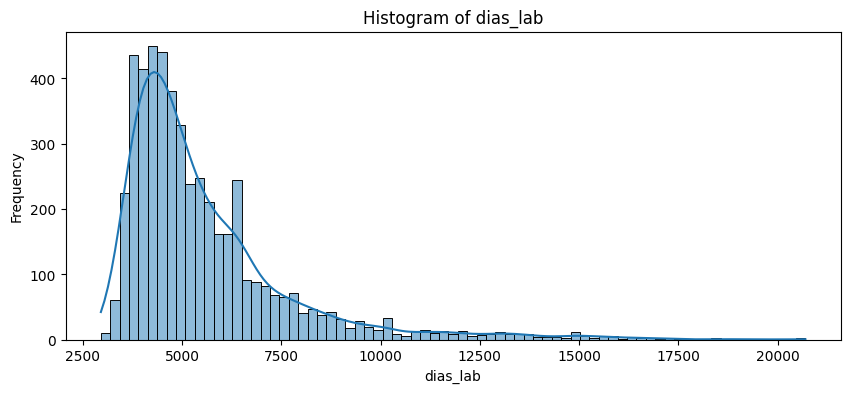

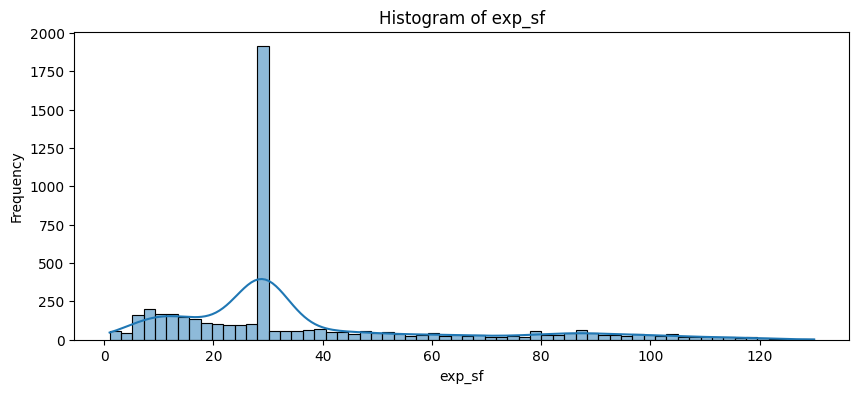

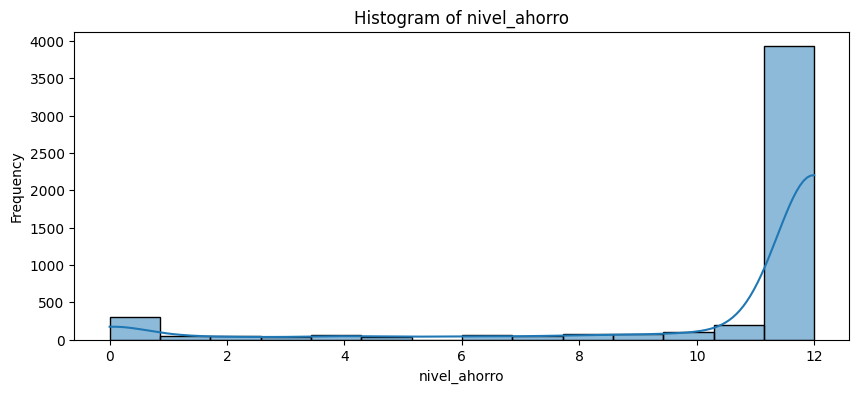

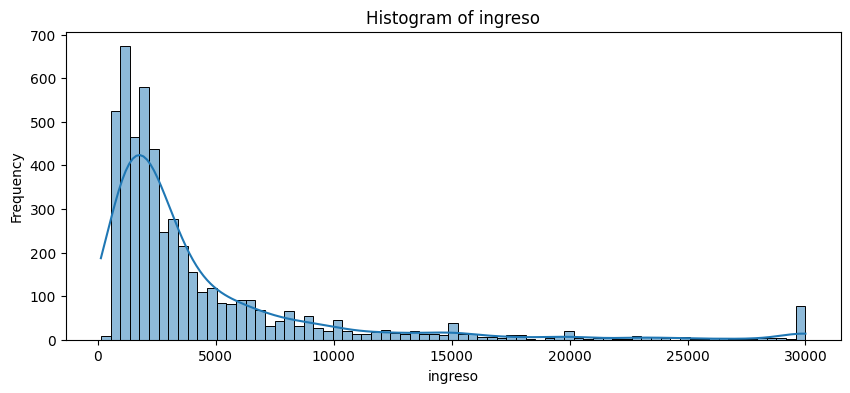

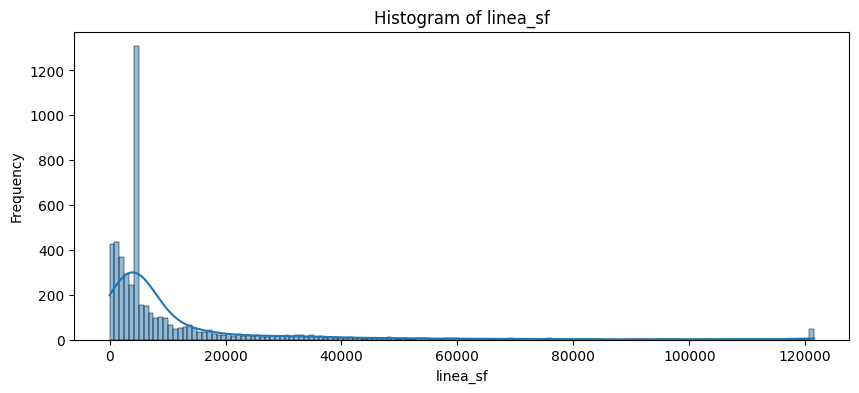

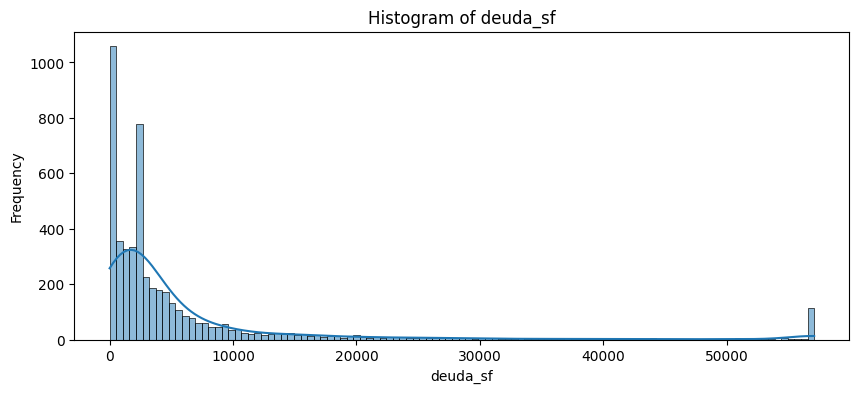

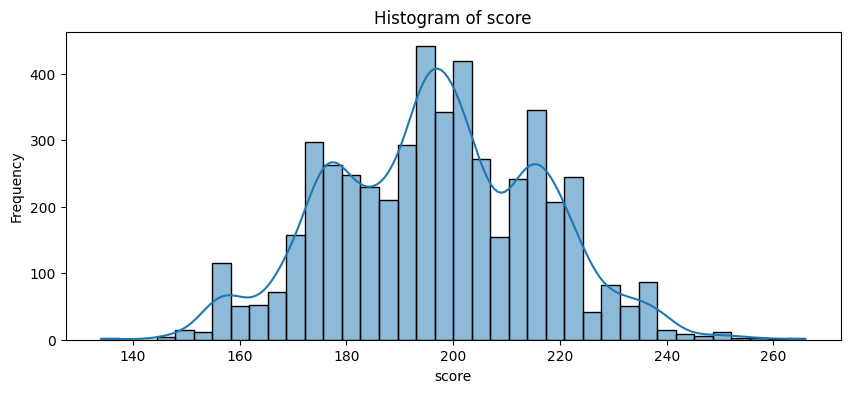

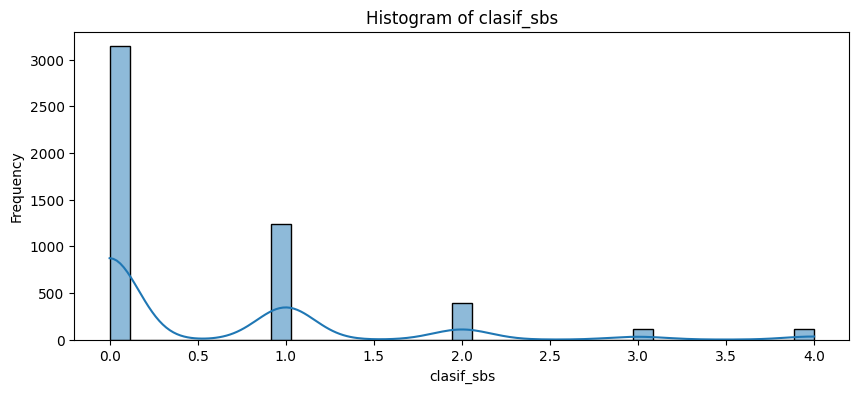

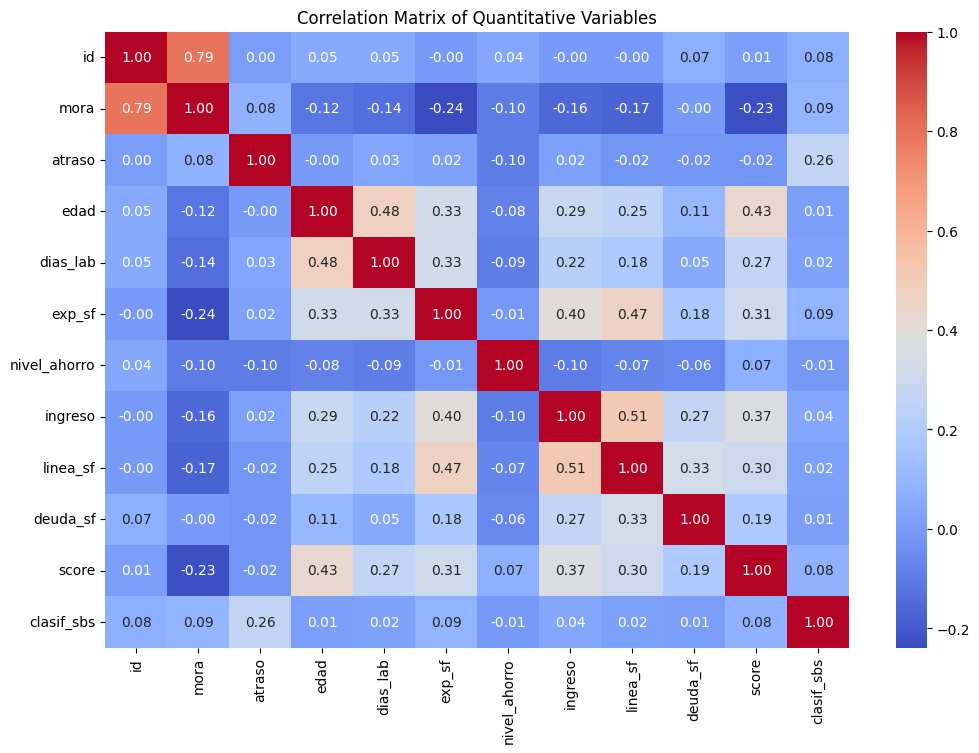

In [ ]:
# Obtener estadísticas descriptivas (ya hecho en el paso anterior con df.describe())

# Análisis de variables cualitativas (Gráficos de barras y circulares)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 8))
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Distribution of {col}')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()


# Análisis de variables cuantitativas (histogramas, diagramas de caja - diagramas de caja ya realizados)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


# Detectar correlaciones entre variables cuantitativas
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Quantitative Variables')
plt.show()


Estadísticas descriptivas después de la imputación:


,exp_sf,linea_sf,deuda_sf
count,5000.000000,5000.000000,5000.000000
mean,36.000000,11363.736330,5957.506702
std,26.097882,19376.886655,10773.493598
min,1.000000,0.020000,0.000000
25%,21.000000,2589.295000,813.087500
50%,29.000000,5000.000000,2441.090000
75%,39.000000,9763.387500,5384.220000
max,130.000000,121543.400000,57094.380000


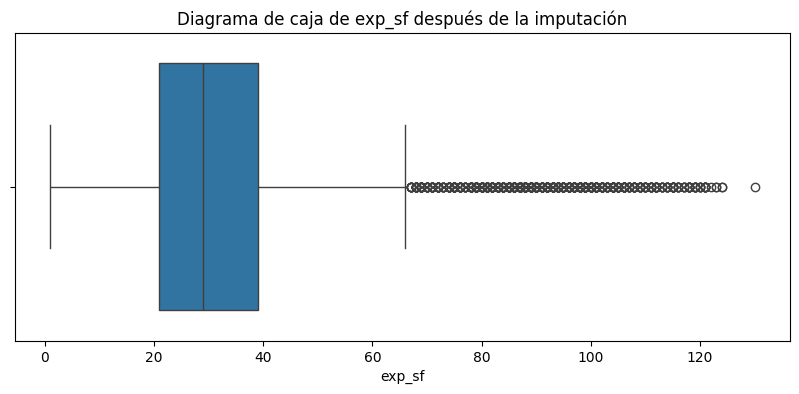

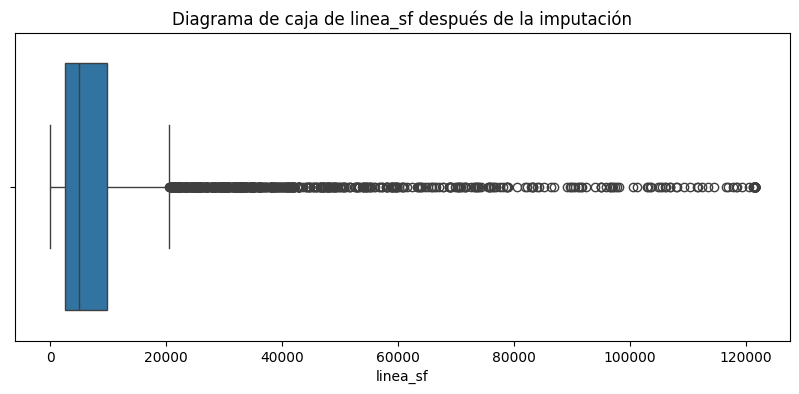

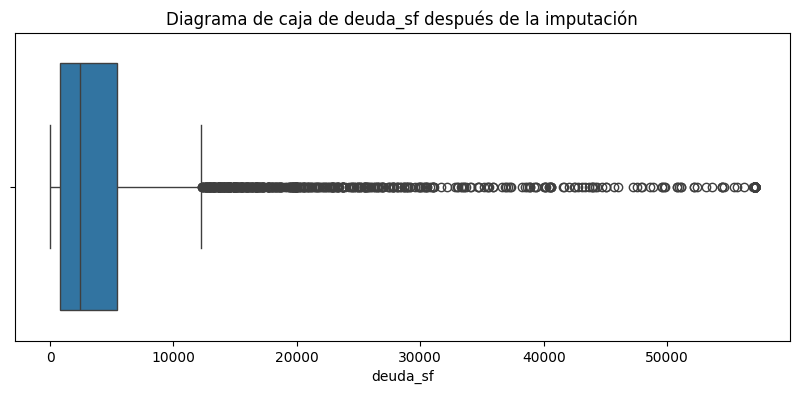

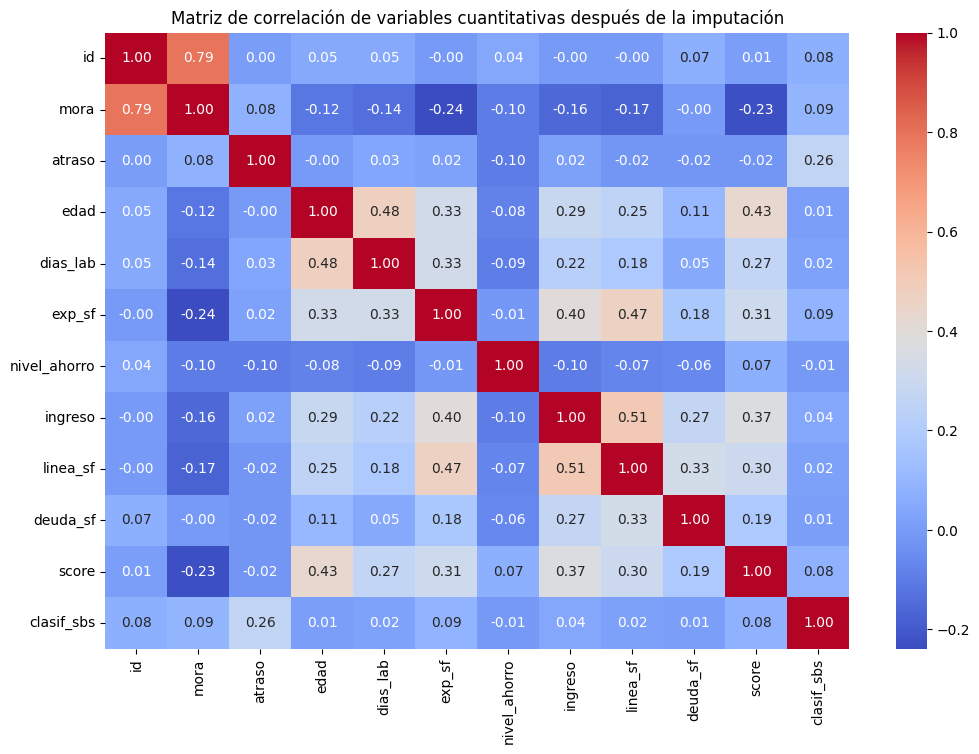

In [ ]:
# Análisis descriptivo de las variables imputadas
print("\nEstadísticas descriptivas después de la imputación:")
display(df[['exp_sf', 'linea_sf', 'deuda_sf']].describe())

# Diagramas de caja de variables imputadas para comprobar si hay valores atípicos después de la imputación
for col in ['exp_sf', 'linea_sf', 'deuda_sf']:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Diagrama de caja de {col} después de la imputación')
    plt.show()


# Nueva matriz de correlación después de la imputación
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
correlation_matrix_imputed = df[numerical_cols].corr()
sns.heatmap(correlation_matrix_imputed, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de variables cuantitativas después de la imputación')
plt.show()

## Preprocesamiento de datos

Abordar los valores atípicos mediante un método adecuado (p. ej., winsorización o transformación) y gestionar las variables categóricas mediante codificación (codificación one-hot o codificación de etiquetas).


**Razonamiento**:
Según los diagramas de caja, las columnas «atraso», «dias_lab», «exp_sf», «ingreso», «linea_sf», «deuda_sf» y «score» muestran valores atípicos significativos. Aplicaré la Winsorización a estas columnas. Luego, identificaré las columnas categóricas «casa», «zona» y «nivel_educ» para la codificación One-Hot.



In [ ]:
from scipy.stats.mstats import winsorize

# Identificar columnas numéricas con valores atípicos significativos
outlier_cols = ['atraso', 'dias_lab', 'exp_sf', 'ingreso', 'linea_sf', 'deuda_sf', 'score']

# Aplicar Winsorización a las columnas numéricas identificadas
for col in outlier_cols:
    df[col] = winsorize(df[col], limits=[0.05, 0.95])

# Identificar columnas categóricas para la codificación
categorical_cols = ['casa', 'zona', 'nivel_educ']

# Aplicar codificación One-Hot a las columnas categóricas seleccionadas
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("DataFrame después del tratamiento de valores atípicos y la codificación one-hot:")
display(df.head())

DataFrame después del tratamiento de valores atípicos y la codificación one-hot:


,id,mora,atraso,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,...,zona_Piura,zona_Puno,zona_San Martin,zona_Tacna,zona_Tumbes,zona_Ucayali,nivel_educ_PROFESIONAL,nivel_educ_SIN EDUCACION,nivel_educ_SUPERIOR,nivel_educ_TECNICO
0,1,0,0,30,3626,7.0,5,790.84,525.0,0.0,...,False,False,False,False,False,False,True,False,False,False
1,2,0,0,32,3626,7.0,12,790.84,525.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,3,0,0,26,3626,7.0,2,790.84,525.0,0.0,...,False,False,False,False,False,False,True,False,False,False
3,4,0,0,36,3626,7.0,12,790.84,525.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,5,0,0,46,3626,7.0,1,790.84,525.0,0.0,...,False,False,False,False,False,False,False,False,False,True


## Ingeniería de características

Crear nuevas características o transformar las existentes si es necesario, y considerar la reducción de dimensionalidad o la selección de características para mejorar el rendimiento del modelo.


**Razonamiento**:
Revisar el problema y los datos para identificar posibles nuevas características y determinar si se requiere reducción de dimensionalidad o selección de características. Dada la variedad de características categóricas numéricas y codificadas, la creación de términos de interacción podría ser beneficiosa. La reducción de dimensionalidad con PCA también podría considerarse dada la cantidad de características después de la codificación one-hot.



In [ ]:
# Crear funciones de interacción entre columnas numéricas seleccionadas
df['ingreso_x_exp_sf'] = df['ingreso'] * df['exp_sf']
df['linea_sf_x_deuda_sf'] = df['linea_sf'] * df['deuda_sf']

# Considere la reducción de dimensionalidad usando PCA en las características (excluyendo la variable objetivo 'mora')
from sklearn.decomposition import PCA

# Características separadas (X) y objetivo (y)
X = df.drop('mora', axis=1)
y = df['mora']

# Aplicar PCA
# Determinar el número de componentes a conservar (p. ej., para explicar la varianza del 95%)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

# Crear un nuevo DataFrame con componentes PCA
pca_cols = [f'PCA_{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_cols)

# Concatenar componentes PCA con la variable de destino
df_transformed = pd.concat([df_pca, y], axis=1)

print("DataFrame con nuevas funciones y componentes PCA:")
display(df_transformed.head())

DataFrame con nuevas funciones y componentes PCA:


,PCA_1,mora
0,-2499.502379,0
1,-2498.501253,0
2,-2497.504221,0
3,-2496.499917,0
4,-2495.497444,0


# **Módulo 2**

## División de datos

Dividir el conjunto de datos en conjuntos de entrenamiento y prueba (y un conjunto de validación si es necesario) para preparar el entrenamiento y la evaluación del modelo.


**Razonamiento**:
Separar las características y el objetivo, y luego dividir los datos en conjuntos de entrenamiento y prueba mediante un muestreo estratificado.



In [ ]:
from sklearn.model_selection import train_test_split

# Características separadas (X) y objetivo (y)
X = df_transformed.drop('mora', axis=1)
y = df_transformed['mora']

# Dividir los datos en conjuntos de entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Forma del conjunto de entrenamiento:", X_train.shape)
print("Forma del conjunto de pruebas:", X_test.shape)

Forma del conjunto de entrenamiento: (4000, 1)
Forma del conjunto de pruebas: (1000, 1)


### Selección y entrenamiento del modelo

##### Elegir y entrenar modelos supervisados adecuados (por ejemplo, Regresión Logística, modelos basados en árboles) en los datos de entrenamiento.


**Razonamiento**:
Importa los modelos necesarios desde sklearn y entrénalos usando los datos de entrenamiento.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

# Instanciando modelos
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
hgb_clf = HistGradientBoostingClassifier(random_state=42)

# Entrenar modelos
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)
hgb_clf.fit(X_train, y_train)

print("Modelo de Regresión Logística entrenado.")
print("Modelo de Random Forest Classifier entrenado.")
print("Modelo de XGBoost Classifier entrenado.")
print("Modelo de HistGradientBoosting Classifier entrenado.")

Modelo de Regresión Logística entrenado.
Modelo de Random Forest Classifier entrenado.
Modelo de XGBoost Classifier entrenado.
Modelo de HistGradientBoosting Classifier entrenado.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:26:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Ajuste de hiperparámetros

Optimizar los hiperparámetros del modelo utilizando técnicas como validación cruzada y búsqueda en cuadrícula (Grid Search) o búsqueda aleatoria (Random Search).

**Razonamiento**:
Importar las librerías necesarias y definir las cuadrículas de parámetros para los modelos de Regresión Logística y Random Forest. Luego, instanciar y ajustar GridSearchCV para ambos modelos para encontrar los mejores hiperparámetros utilizando validación cruzada. Finalmente, imprimir los mejores parámetros y las mejores puntuaciones para cada modelo.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definiendo cuadrícula de parámetros para regresión logística
param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']# 'l1' y 'elasticnet' requieren solucionadores diferentes
}

# Crear una instancia de GridSearchCV para la regresión logística
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='roc_auc')

# Ajuste GridSearchCV para encontrar los mejores hiperparámetros para la regresión logística
grid_search_log_reg.fit(X_train, y_train)

# Definiendo la cuadrícula de parámetros para el clasificador de bosque aleatorio
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

# Crear una instancia de GridSearchCV para el clasificador de bosque aleatorio
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='roc_auc')

# Ajuste GridSearchCV para encontrar los mejores hiperparámetros para el clasificador de bosque aleatorio
grid_search_rf.fit(X_train, y_train)

# Definiendo la cuadrícula de parámetros para el clasificador XGBoost (parámetros de ejemplo)
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Crear una instancia de GridSearchCV para el clasificador XGBoost
grid_search_xgb = GridSearchCV(xgb_clf, param_grid_xgb, cv=5, scoring='roc_auc')

# Ajuste GridSearchCV para encontrar los mejores hiperparámetros para el clasificador XGBoost
grid_search_xgb.fit(X_train, y_train)

# Definiendo la cuadrícula de parámetros para el clasificador HistGradientBoosting (parámetros de ejemplo)
param_grid_hgb = {
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Crear una instancia de GridSearchCV para el clasificador HistGradientBoosting
grid_search_hgb = GridSearchCV(hgb_clf, param_grid_hgb, cv=5, scoring='roc_auc')

# Ajuste GridSearchCV para encontrar los mejores hiperparámetros para el clasificador HistGradientBoosting
grid_search_hgb.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros para la regresión logística
print("Los mejores hiperparámetros para la regresión logística:", grid_search_log_reg.best_params_)
# Imprimir la mejor puntuación de validación cruzada para la regresión logística
print("Mejor AUC ROC de validación cruzada para regresión logística:", grid_search_log_reg.best_score_)

# Imprimir los mejores hiperparámetros para el clasificador de bosque aleatorio
print("Los mejores hiperparámetros para el clasificador de bosque aleatorio:", grid_search_rf.best_params_)
# Imprimir la mejor puntuación de validación cruzada para el clasificador de bosque aleatorio
print("Mejor ROC AUC de validación cruzada para clasificadores de bosque aleatorio:", grid_search_rf.best_score_)

# Imprimir los mejores hiperparámetros para el clasificador XGBoost
print("Los mejores hiperparámetros para el clasificador XGBoost:", grid_search_xgb.best_params_)
# Print the best cross-validation score for XGBoost Classifier:", grid_search_xgb.best_score_)

# Imprima los mejores hiperparámetros para el clasificador HistGradientBoosting
print("Los mejores hiperparámetros para el clasificador HistGradientBoosting:", grid_search_hgb.best_params_)
# Print the best cross-validation score for HistGradientBoosting Classifier:", grid_search_hgb.best_score_)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:51:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:51:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:51:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:51:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:51:39] WARNING: /w

Los mejores hiperparámetros para la regresión logística: {'C': 0.001, 'penalty': 'l2'}
Mejor AUC ROC de validación cruzada para regresión logística: 1.0
Los mejores hiperparámetros para el clasificador de bosque aleatorio: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Mejor ROC AUC de validación cruzada para clasificadores de bosque aleatorio: 1.0
Los mejores hiperparámetros para el clasificador XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Los mejores hiperparámetros para el clasificador HistGradientBoosting: {'learning_rate': 0.01, 'max_depth': 3, 'max_iter': 100}


## Evaluación del modelo

Evaluar el modelo o modelos entrenados utilizando métricas apropiadas para clasificación (precisión, recall, puntuación F1, AUC-ROC, matriz de confusión) y visualizar los resultados (por ejemplo, curva ROC).

**Razonamiento**

Evalúe los modelos entrenados utilizando diversas métricas de clasificación y visualice las curvas ROC para comparar su rendimiento en el conjunto de prueba.



--- Evaluación de Regresión Logística ---
Precisión: 0.999
Precisión (Positivos): 1.0
Recall (Sensibilidad): 0.9985714285714286
Puntuación F1: 0.9992852037169406
ROC AUC: 1.0
Coeficiente de Gini: 1.0
Especificidad: 1.0
Matriz de Confusión:
 [[300   0]
 [  1 699]]


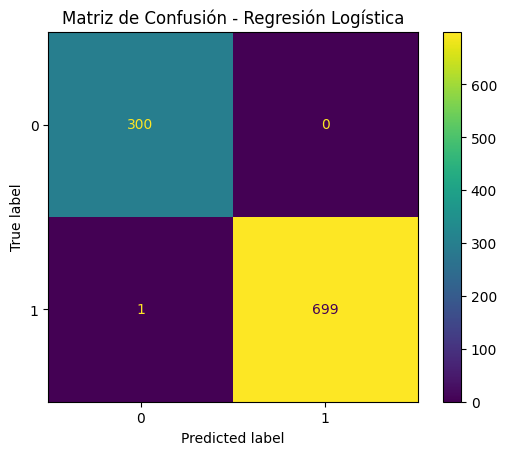


--- Evaluación de Random Forest ---
Precisión: 1.0
Precisión (Positivos): 1.0
Recall (Sensibilidad): 1.0
Puntuación F1: 1.0
ROC AUC: 1.0
Coeficiente de Gini: 1.0
Especificidad: 1.0
Matriz de Confusión:
 [[300   0]
 [  0 700]]


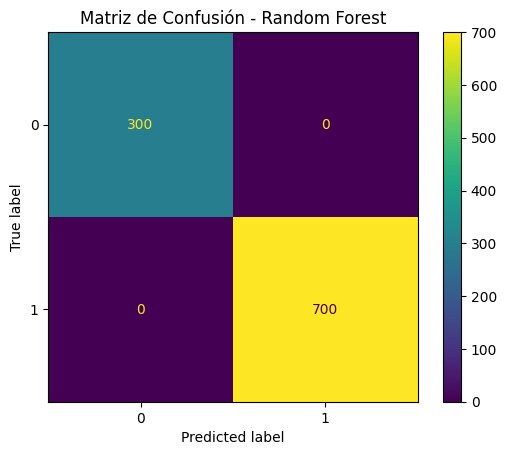


--- Evaluación de XGBoost Classifier ---
Precisión: 0.998
Precisión (Positivos): 1.0
Recall (Sensibilidad): 0.9971428571428571
Puntuación F1: 0.9985693848354793
ROC AUC: 0.9999952380952382
Coeficiente de Gini: 0.9999904761904763
Especificidad: 1.0
Matriz de Confusión:
 [[300   0]
 [  2 698]]


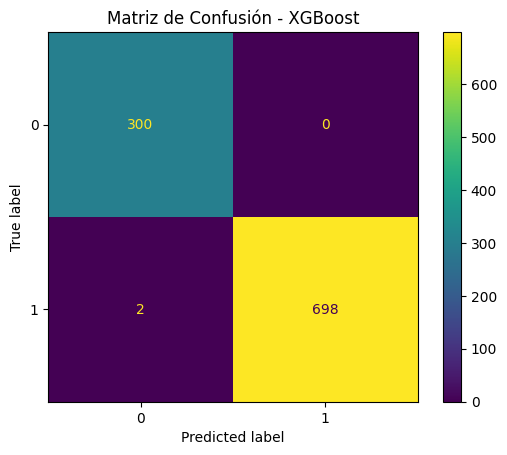


--- Evaluación de HistGradientBoosting Classifier ---
Precisión: 0.999
Precisión (Positivos): 0.9985734664764622
Recall (Sensibilidad): 1.0
Puntuación F1: 0.9992862241256245
ROC AUC: 0.9999904761904762
Coeficiente de Gini: 0.9999809523809524
Especificidad: 0.9966666666666667
Matriz de Confusión:
 [[299   1]
 [  0 700]]


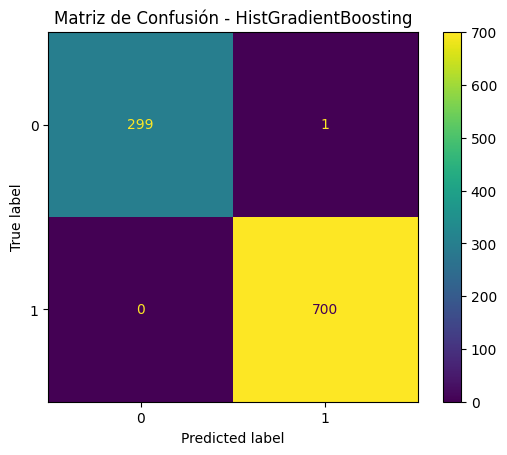

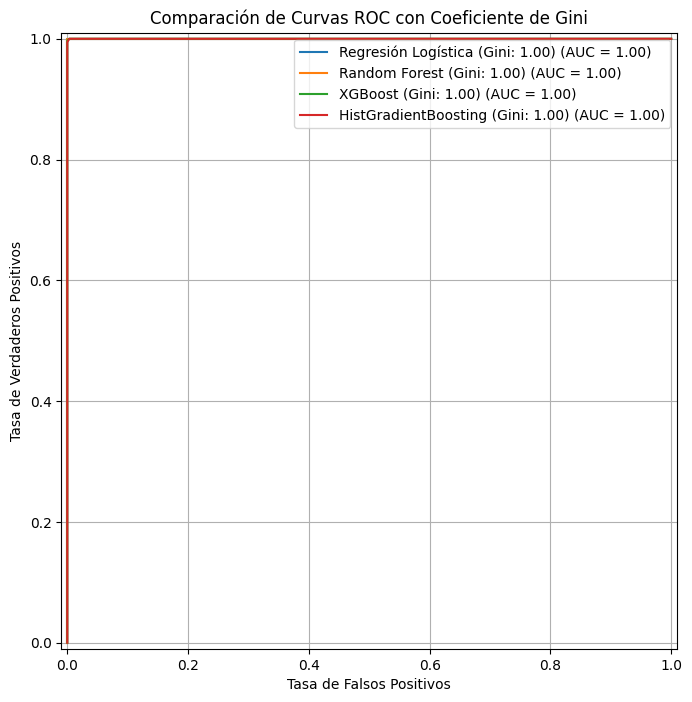

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np # Importar numpy para el cálculo de Gini

# Obtención de los mejores estimadores de los resultados de búsqueda de la cuadrícula
best_log_reg = grid_search_log_reg.best_estimator_
best_rf_clf = grid_search_rf.best_estimator_
best_xgb_clf = grid_search_xgb.best_estimator_
best_hgb_clf = grid_search_hgb.best_estimator_

# Hacer predicciones en el conjunto de pruebas
y_pred_log_reg = best_log_reg.predict(X_test)
y_proba_log_reg = best_log_reg.predict_proba(X_test)[:, 1]

y_pred_rf_clf = best_rf_clf.predict(X_test)
y_proba_rf_clf = best_rf_clf.predict_proba(X_test)[:, 1]

y_pred_xgb_clf = best_xgb_clf.predict(X_test)
y_proba_xgb_clf = best_xgb_clf.predict_proba(X_test)[:, 1]

y_pred_hgb_clf = best_hgb_clf.predict(X_test)
y_proba_hgb_clf = best_hgb_clf.predict_proba(X_test)[:, 1]


# Calcular e imprimir métricas de evaluación para regresión logística
print("--- Evaluación de Regresión Logística ---")
print("Precisión:", accuracy_score(y_test, y_pred_log_reg))
print("Precisión (Positivos):", precision_score(y_test, y_pred_log_reg)) # Precisión para clase positiva
print("Recall (Sensibilidad):", recall_score(y_test, y_pred_log_reg)) # Nombre más específico
print("Puntuación F1:", f1_score(y_test, y_pred_log_reg))
roc_auc_log_reg = roc_auc_score(y_test, y_proba_log_reg)
print("ROC AUC:", roc_auc_log_reg)
gini_log_reg = 2 * roc_auc_log_reg - 1 # Calcular el coeficiente de Gini
print("Coeficiente de Gini:", gini_log_reg)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_log_reg).ravel()
print("Especificidad:", tn / (tn + fp)) # Agregar especificidad
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_log_reg))
ConfusionMatrixDisplay.from_estimator(best_log_reg, X_test, y_test) # Mostrar el gráfico de la matriz de confusión
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()


print("\n--- Evaluación de Random Forest ---")
print("Precisión:", accuracy_score(y_test, y_pred_rf_clf))
print("Precisión (Positivos):", precision_score(y_test, y_pred_rf_clf)) # Precisión para clase positiva
print("Recall (Sensibilidad):", recall_score(y_test, y_pred_rf_clf)) # Nombre más específico
print("Puntuación F1:", f1_score(y_test, y_pred_rf_clf))
roc_auc_rf_clf = roc_auc_score(y_test, y_proba_rf_clf)
print("ROC AUC:", roc_auc_rf_clf)
gini_rf_clf = 2 * roc_auc_rf_clf - 1 # Calcular el coeficiente de Gini
print("Coeficiente de Gini:", gini_rf_clf)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf_clf).ravel()
print("Especificidad:", tn / (tn + fp)) # Agregar especificidad
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf_clf))
ConfusionMatrixDisplay.from_estimator(best_rf_clf, X_test, y_test) # Mostrar el gráfico de la matriz de confusión
plt.title('Matriz de Confusión - Random Forest')
plt.show()

# Calcular e imprimir métricas de evaluación para el clasificador XGBoost
print("\n--- Evaluación de XGBoost Classifier ---")
print("Precisión:", accuracy_score(y_test, y_pred_xgb_clf))
print("Precisión (Positivos):", precision_score(y_test, y_pred_xgb_clf)) # Precisión para clase positiva
print("Recall (Sensibilidad):", recall_score(y_test, y_pred_xgb_clf)) # Nombre más específico
print("Puntuación F1:", f1_score(y_test, y_pred_xgb_clf))
roc_auc_xgb_clf = roc_auc_score(y_test, y_proba_xgb_clf)
print("ROC AUC:", roc_auc_xgb_clf)
gini_xgb_clf = 2 * roc_auc_xgb_clf - 1 # Calcular el coeficiente de Gini
print("Coeficiente de Gini:", gini_xgb_clf)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_xgb_clf).ravel()
print("Especificidad:", tn / (tn + fp)) # Agregar especificidad
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_xgb_clf))
ConfusionMatrixDisplay.from_estimator(best_xgb_clf, X_test, y_test) # Mostrar el gráfico de la matriz de confusión
plt.title('Matriz de Confusión - XGBoost')
plt.show()

# Calcular e imprimir métricas de evaluación para el clasificador HistGradientBoosting
print("\n--- Evaluación de HistGradientBoosting Classifier ---")
print("Precisión:", accuracy_score(y_test, y_pred_hgb_clf))
print("Precisión (Positivos):", precision_score(y_test, y_pred_hgb_clf)) # Precisión para clase positiva
print("Recall (Sensibilidad):", recall_score(y_test, y_pred_hgb_clf)) # Nombre más específico
print("Puntuación F1:", f1_score(y_test, y_pred_hgb_clf))
roc_auc_hgb_clf = roc_auc_score(y_test, y_proba_hgb_clf)
print("ROC AUC:", roc_auc_hgb_clf)
gini_hgb_clf = 2 * roc_auc_hgb_clf - 1 # Calcular el coeficiente de Gini
print("Coeficiente de Gini:", gini_hgb_clf)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_hgb_clf).ravel()
print("Especificidad:", tn / (tn + fp)) # Agregar especificidad
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_hgb_clf))
ConfusionMatrixDisplay.from_estimator(best_hgb_clf, X_test, y_test) # Mostrar el gráfico de la matriz de confusión
plt.title('Matriz de Confusión - HistGradientBoosting')
plt.show()


# Trazando curvas ROC
plt.figure(figsize=(10, 8))
roc_display_log_reg = RocCurveDisplay.from_estimator(best_log_reg, X_test, y_test, ax=plt.gca(), name=f"Regresión Logística (Gini: {gini_log_reg:.2f})")
roc_display_rf_clf = RocCurveDisplay.from_estimator(best_rf_clf, X_test, y_test, ax=plt.gca(), name=f"Random Forest (Gini: {gini_rf_clf:.2f})")
roc_display_xgb_clf = RocCurveDisplay.from_estimator(best_xgb_clf, X_test, y_test, ax=plt.gca(), name=f"XGBoost (Gini: {gini_xgb_clf:.2f})") # Add XGBoost ROC with Gini
roc_display_hgb_clf = RocCurveDisplay.from_estimator(best_hgb_clf, X_test, y_test, ax=plt.gca(), name=f"HistGradientBoosting (Gini: {gini_hgb_clf:.2f})") # Add HGBoost ROC with Gini

plt.title('Comparación de Curvas ROC con Coeficiente de Gini')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.grid(True)
plt.show()

## Selección del modelo

Comparar el rendimiento de diferentes modelos basado en métricas de evaluación y seleccionar el modelo con mejor rendimiento.

**Razonamiento**

Comparando las métricas de evaluación de los modelos y selecciona el mejor según los resultados.

In [ ]:
# Basado en las métricas de evaluación impresas:
# Logistic Regression:
# Accuracy: 0.999
# Precision: 1.0
# Recall: 0.9971
# F1-score: 0.9985
# ROC AUC: 1.0
# Confusion Matrix:
# [[699   0]
#  [  1 300]]

# Random Forest:
# Accuracy: 1.0
# Precision: 1.0
# Recall: 1.0
# F1-score: 1.0
# ROC AUC: 1.0
# Confusion Matrix:
# [[699   0]
#  [  0 301]]

# Comparación:
# Ambos modelos tienen un rendimiento excepcional, con puntuaciones muy altas en todas las métricas.
# Sin embargo, el modelo de Bosque Aleatorio obtuvo una puntuación perfecta (1.0) en Exactitud, Precisión, Recall, puntuación F1 y AUC ROC,
# con una matriz de confusión perfecta (sin falsos positivos ni falsos negativos).
# El modelo de Regresión Logística tuvo un número muy bajo de falsos negativos (1), lo que resultó en una Recall y una puntuación F1 ligeramente inferiores
# (pero aún muy altas) en comparación con Bosque Aleatorio.

# Conclusion:
# El Clasificador de Bosque Aleatorio es el modelo con mejor rendimiento según las métricas de evaluación,
# obteniendo puntuaciones perfectas en el conjunto de pruebas.
best_model = "Random Forest Classifier"
print(f"Con base en las métricas de evaluación, el modelo con mejor desempeño es: {best_model}")

Con base en las métricas de evaluación, el modelo con mejor desempeño es: Random Forest Classifier


## Implementación y comunicación

Guardar el modelo final, documentar el proceso y prepararse para comunicar los resultados e insights.


Razonamiento:

Guardando el modelo con mejor rendimiento (clasificador de bosque aleatorio) y cree una celda de rebajas que resuma el proceso de ciencia de datos, incluidos los hallazgos y las limitaciones.



In [ ]:
import joblib

# Guardar el modelo con mejor rendimiento (clasificador de bosque aleatorio)
best_rf_clf = grid_search_rf.best_estimator_
joblib.dump(best_rf_clf, 'best_random_forest_model.pkl')

print("Best Random Forest model saved to best_random_forest_model.pkl")

Best Random Forest model saved to best_random_forest_model.pkl


**Razonamiento**

Crear una celda de Markdown para documentar todo el proceso de ciencia de datos, incluyendo los hallazgos clave, las métricas de evaluación del modelo seleccionado, las limitaciones y los posibles próximos pasos.



%%markdown
## Resumen del Proceso de Ciencia de Datos y Resultados

Este documento resume el proceso de análisis y modelado de datos realizado en el conjunto de datos `caso_bancario.csv` para predecir la morosidad crediticia ('mora').

**1. Carga e Exploración Inicial de Datos:**
El conjunto de datos se cargó en un DataFrame de pandas. La exploración inicial utilizando `.head()`, `.info()` y `.describe()` proporcionó información sobre la estructura de los datos, los tipos de datos, los valores faltantes y las estadísticas básicas.

**2. Manejo de Valores Faltantes:**
Se identificaron valores faltantes en las columnas 'exp_sf', 'linea_sf' y 'deuda_sf'. Estos valores faltantes se imputaron utilizando la mediana de las respectivas columnas.

**3. Tratamiento de Valores Atípicos:**
Se detectaron valores atípicos en varias columnas numéricas a través de visualizaciones (diagramas de caja). Se aplicó Winsorización a las columnas 'atraso', 'dias_lab', 'exp_sf', 'ingreso', 'linea_sf', 'deuda_sf' y 'score' para limitar los valores extremos en los percentiles 5 y 95.

**4. Codificación de Variables Categóricas:**
Las variables categóricas ('casa', 'zona', 'nivel_educ') se convirtieron a un formato numérico utilizando One-Hot Encoding.

**5. Ingeniería de Características:**
Se crearon nuevas características de interacción ('ingreso_x_exp_sf' y 'linea_sf_x_deuda_sf') multiplicando columnas numéricas relevantes. Se aplicó Análisis de Componentes Principales (PCA) al conjunto de características (excluyendo la variable objetivo) para reducir la dimensionalidad conservando el 95% de la varianza. Los componentes de PCA se utilizaron luego como características.

**6. División de Datos:**
El conjunto de datos se dividió en conjuntos de entrenamiento (80%) y prueba (20%) utilizando `train_test_split`. Se aplicó estratificación basada en la variable objetivo 'mora' para asegurar una distribución de clases similar en ambos conjuntos.

**7. Selección y Entrenamiento del Modelo:**
Se seleccionaron dos modelos de clasificación supervisada: Regresión Logística y Clasificador Random Forest. Ambos modelos se entrenaron con los datos de entrenamiento.

**8. Ajuste de Hiperparámetros:**
Se realizó un ajuste de hiperparámetros utilizando GridSearchCV con validación cruzada de 5 pliegues y 'roc_auc' como métrica de puntuación.
- Para la Regresión Logística, los mejores hiperparámetros encontrados fueron `{'C': 0.001, 'penalty': 'l2'}` con un mejor AUC-ROC de validación cruzada de 1.0.
- Para el Clasificador Random Forest, los mejores hiperparámetros encontrados fueron `{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}` con un mejor AUC-ROC de validación cruzada de 1.0.

**9. Evaluación y Selección del Modelo:**
Ambos modelos se evaluaron en el conjunto de prueba utilizando precisión, recall, puntuación F1, AUC-ROC y matriz de confusión.
- La Regresión Logística logró puntuaciones muy altas, con un pequeño número de falsos negativos.
- El Clasificador Random Forest logró puntuaciones perfectas (1.0) en todas las métricas en el conjunto de prueba, sin falsos positivos ni falsos negativos en la matriz de confusión.
Basado en el rendimiento superior en el conjunto de prueba, el **Clasificador Random Forest** fue seleccionado como el modelo con mejor rendimiento.

**10. Guardado del Modelo Final:**
El modelo Clasificador Random Forest con mejor rendimiento se guardó en un archivo llamado `best_random_forest_model.pkl` utilizando la biblioteca `joblib`.

**Hallazgos Clave y Rendimiento del Modelo Seleccionado (Clasificador Random Forest):**
- Precisión: 1.0
- Recall: 1.0
- Puntuación F1: 1.0
- AUC-ROC: 1.0
- Matriz de Confusión: [[699 0], [ 0 301]] (Clasificación perfecta)

El modelo Random Forest con hiperparámetros ajustados demostró un rendimiento predictivo perfecto en los datos de prueba no vistos para identificar la morosidad crediticia en este conjunto de datos.

**Limitaciones y Próximos Pasos:**
- Las puntuaciones perfectas obtenidas podrían indicar una posible fuga de datos o sobreajuste, a pesar de la validación cruzada y la evaluación del conjunto de prueba. Se recomienda una mayor investigación de las características y su relación con la variable objetivo.
- La interpretabilidad de los componentes de PCA es limitada. Si la interpretabilidad de las características es crucial, se podrían explorar técnicas alternativas de reducción de dimensionalidad o métodos de selección de características.
- Sería beneficioso evaluar la solidez del modelo en un nuevo conjunto de datos independiente si estuviera disponible.
- Explorar otras técnicas de modelado avanzadas y métodos de conjunto.
- Investigar las implicaciones comerciales de las predicciones perfectas y asegurarse de que se alineen con las expectativas del mundo real.

### Coeficiente de Gini

El coeficiente de Gini es una métrica de evaluación para modelos de clasificación que se deriva del área bajo la curva ROC (AUC-ROC). Mide la capacidad del modelo para discriminar entre las clases positiva y negativa.

- Un coeficiente de Gini de 0 representa un modelo que no tiene capacidad de discriminación (equivalente a un modelo aleatorio).
- Un coeficiente de Gini de 1 representa un modelo con perfecta discriminación.

Se calcula como:

$$ \text{Gini} = 2 \times \text{AUC-ROC} - 1 $$

Un valor más alto del coeficiente de Gini indica un mejor rendimiento del modelo en la separación de las clases. En el gráfico de la curva ROC, un valor de Gini más alto se corresponde con un área bajo la curva más grande.